# 학습 후 모델 저장하기

In [1]:
# Tensorflow와 Matplotlib 들여오기
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\c0m3t\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#고정된 값 사용을 위해 seed를 임의의 값으로 정하기
tf.set_random_seed(777)

**[data.csv](https://pastebin.com/Ng0tZjmE) : <https://pastebin.com/Ng0tZjmE>**

In [3]:
#queue 생성 및 파일 이름 저장
filename_queue = tf.train.string_input_producer(
    ['data.csv'], shuffle=False, name='filename_queue')

In [4]:
#TextLineReader()로 한 줄씩 문자열을 읽어오고
#read()로 읽어온 문자열을 key와 value를 나눠 저장
reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

In [5]:
# value를 불러와서 decode_csv 를 이용하여 xy에 저장
# 빈 값은 record_defaults 형식에 따름
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

In [6]:
# xy의 0, 1, 2번째 원소는 train_x_batch
# xy의 3번째 (마지막) 원소는 train_y_batch에 저장
# batch_size는 10으로 지정
train_x_batch, train_y_batch = \
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

In [7]:
# X는 입력 데이터, Y는 정답
# X는 [1 x 3], Y는 [1 x 1] 형태로 공간 할당
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

In [8]:
# W는 가중치, b는 편향
# W는 [3 x 1], b는 [1 x 1] 형태로 임의의 값을 지정
W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

\begin{equation*}
H(x) = \begin{pmatrix} { x_1 } & { x_2 } & { x_3 } \end{pmatrix}\begin{pmatrix} { W_1 } \\ { W_2 } \\ { W_3 } \end{pmatrix}+b
\end{equation*}

In [9]:
# 가설 설정
hypothesis = tf.matmul(X, W) + b

\begin{equation*}
cost(W,b)=\frac { 1 }{ m } \sum _{ i=1 }^{ m }{ { \left( H({ x }_{ i })-{ y }_{ i } \right)  }^{ 2 } } 
\end{equation*}

In [10]:
# 간략화된 비용 함수
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [11]:
# GradientDescentOptimizer() 로 기울기를 하강하며 최적화
# learning_rate는 0.00001로 지정
# cost를 줄여가며 학습
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [12]:
# 세션의 그래프를 실행 시킴
sess = tf.Session()

In [13]:
# 그래프의 변수들을 초기화함
sess.run(tf.global_variables_initializer())

In [14]:
# 학습된 값과 비교하기 위해 학습 이전의 모델을 출력
print("'W' before training:\n", sess.run(W))
print("'b' before training: ", sess.run(b))

'W' before training:
 [[0.79683775]
 [1.012668  ]
 [1.2853057 ]]
'b' before training:  [-0.35269436]


In [15]:
# 그래프를 그리기 위해 대표값을 담을 리스트 생성
axisX = []
axisY = []

In [16]:
# queue를 실행함
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

In [17]:
# 학습을 2000번 수행
for step in range(2001):
    # train_x_batch와 train_y_batch의 값을 x_batch, y_batch에 저장
    # 그리고 다음 값을 채움
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    
    # x_batch와 y_batch의 값을 X, Y에 대입해 학습하고
    # 가설과 비용 함수 수행
    # train 자체로는 의미있는 값이 나오지 않기에 _로 변수이름 설정
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_batch, Y: y_batch})
    
    # 학습 횟수가 10의 배수면 횟수와 비용, 예측한 값 출력
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)
        
        # 대표값의 리스트에 저장
        axisX.append(step)
        axisY.append(cost_val)

0 Cost:  7070.9795 
Prediction:
 [[235.22784]
 [282.40146]
 [278.39618]
 [303.91577]
 [214.62396]
 [159.15425]
 [228.5351 ]
 [170.92644]
 [264.65048]
 [246.59116]]
10 Cost:  8.408269 
Prediction:
 [[151.59274]
 [181.92894]
 [179.3753 ]
 [196.05444]
 [138.02611]
 [102.65654]
 [147.75342]
 [110.9773 ]
 [170.73863]
 [159.56593]]
20 Cost:  10.843463 
Prediction:
 [[151.05432]
 [181.33896]
 [178.76556]
 [195.37767]
 [137.60086]
 [102.33009]
 [147.21188]
 [110.52528]
 [170.185  ]
 [159.03012]]
30 Cost:  10.740206 
Prediction:
 [[151.05437]
 [181.39468]
 [178.7928 ]
 [195.395  ]
 [137.6674 ]
 [102.36663]
 [147.19089]
 [110.46059]
 [170.23492]
 [159.0541 ]]
40 Cost:  10.625522 
Prediction:
 [[151.05785]
 [181.45305]
 [178.82335]
 [195.41628]
 [137.73528]
 [102.40449]
 [147.17375]
 [110.40005]
 [170.28734]
 [159.08095]]
50 Cost:  10.517345 
Prediction:
 [[151.06123 ]
 [181.50983 ]
 [178.8531  ]
 [195.43697 ]
 [137.80135 ]
 [102.441345]
 [147.15709 ]
 [110.341156]
 [170.33838 ]
 [159.1071  ]]
60

540 Cost:  8.922381 
Prediction:
 [[151.1557 ]
 [183.02507]
 [179.64922]
 [195.98973]
 [139.5655 ]
 [103.42194]
 [146.71066]
 [108.76592]
 [171.69614]
 [159.79588]]
550 Cost:  8.91918 
Prediction:
 [[151.1567  ]
 [183.03963 ]
 [179.6569  ]
 [195.99504 ]
 [139.58247 ]
 [103.431305]
 [146.70636 ]
 [108.75074 ]
 [171.70912 ]
 [159.80235 ]]
560 Cost:  8.916316 
Prediction:
 [[151.15764]
 [183.05377]
 [179.6644 ]
 [196.00021]
 [139.59897]
 [103.44042]
 [146.70218]
 [108.73598]
 [171.72173]
 [159.80864]]
570 Cost:  8.913773 
Prediction:
 [[151.15857 ]
 [183.06755 ]
 [179.67166 ]
 [196.00523 ]
 [139.61502 ]
 [103.44929 ]
 [146.69807 ]
 [108.721596]
 [171.734   ]
 [159.81474 ]]
580 Cost:  8.911496 
Prediction:
 [[151.15945]
 [183.08093]
 [179.67874]
 [196.0101 ]
 [139.63065]
 [103.45792]
 [146.6941 ]
 [108.7076 ]
 [171.74593]
 [159.82068]]
590 Cost:  8.909465 
Prediction:
 [[151.16035]
 [183.09396]
 [179.68562]
 [196.01488]
 [139.64583]
 [103.46632]
 [146.69023]
 [108.694  ]
 [171.75754]
 [159

1130 Cost:  8.930756 
Prediction:
 [[151.18686]
 [183.457  ]
 [179.87865]
 [196.14726]
 [140.07014]
 [103.6995 ]
 [146.58197]
 [108.31361]
 [172.07947]
 [159.98338]]
1140 Cost:  8.931575 
Prediction:
 [[151.18709 ]
 [183.45988 ]
 [179.88019 ]
 [196.14832 ]
 [140.07353 ]
 [103.701355]
 [146.5811  ]
 [108.31056 ]
 [172.082   ]
 [159.98457 ]]
1150 Cost:  8.932387 
Prediction:
 [[151.18732]
 [183.4627 ]
 [179.8817 ]
 [196.14935]
 [140.07686]
 [103.70317]
 [146.58025]
 [108.30759]
 [172.08447]
 [159.98573]]
1160 Cost:  8.933165 
Prediction:
 [[151.18755 ]
 [183.46545 ]
 [179.88316 ]
 [196.15034 ]
 [140.08006 ]
 [103.704926]
 [146.5794  ]
 [108.30471 ]
 [172.08688 ]
 [159.98686 ]]
1170 Cost:  8.933935 
Prediction:
 [[151.18779 ]
 [183.46812 ]
 [179.88461 ]
 [196.15132 ]
 [140.0832  ]
 [103.706635]
 [146.57861 ]
 [108.30189 ]
 [172.08923 ]
 [159.98796 ]]
1180 Cost:  8.934718 
Prediction:
 [[151.18799]
 [183.4707 ]
 [179.886  ]
 [196.15227]
 [140.08626]
 [103.7083 ]
 [146.57784]
 [108.29915]
 

1620 Cost:  8.957357 
Prediction:
 [[151.19414 ]
 [183.536   ]
 [179.92139 ]
 [196.17581 ]
 [140.16356 ]
 [103.750435]
 [146.55807 ]
 [108.2302  ]
 [172.14842 ]
 [160.01482 ]]
1630 Cost:  8.957616 
Prediction:
 [[151.19426]
 [183.53676]
 [179.92181]
 [196.1761 ]
 [140.16447]
 [103.75092]
 [146.55786]
 [108.22941]
 [172.1491 ]
 [160.0151 ]]
1640 Cost:  8.957975 
Prediction:
 [[151.19432]
 [183.53748]
 [179.9222 ]
 [196.17635]
 [140.16534]
 [103.7514 ]
 [146.55763]
 [108.22863]
 [172.14969]
 [160.01535]]
1650 Cost:  8.958252 
Prediction:
 [[151.1944 ]
 [183.5382 ]
 [179.92259]
 [196.17659]
 [140.16618]
 [103.75188]
 [146.55742]
 [108.22789]
 [172.15031]
 [160.01561]]
1660 Cost:  8.958547 
Prediction:
 [[151.19447]
 [183.53888]
 [179.92296]
 [196.17683]
 [140.167  ]
 [103.75233]
 [146.5572 ]
 [108.22716]
 [172.1509 ]
 [160.01587]]
1670 Cost:  8.958808 
Prediction:
 [[151.19456]
 [183.53955]
 [179.92334]
 [196.17708]
 [140.16783]
 [103.75278]
 [146.557  ]
 [108.22645]
 [172.15149]
 [160.01

In [18]:
# queue 종료
coord.request_stop()
coord.join(threads)

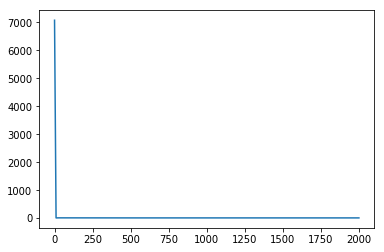

([<matplotlib.lines.Line2D at 0x29525344a58>], None)

In [19]:
# 그래프를 그려서 출력
plt.plot(axisX, axisY), plt.show()

In [20]:
# 학습 이전의 값과 비교하기 위해 학습 후의 모델을 출력
print("'W' before training:\n", sess.run(W))
print("'b' before training: ", sess.run(b))

'W' before training:
 [[0.7473612]
 [0.5256172]
 [0.7401433]]
'b' before training:  [-0.34166136]


In [21]:
# 비교를 위해 저장 전에 임의의 데이터를 집어넣어 값을 예측
print("Your score will be ",
      sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

print("Other scores will be ",
      sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))

Your score will be  [[185.94212]]
Other scores will be  [[162.70897]
 [178.69402]]


In [22]:
#모델에서 W와 b만 선택해서 'TrainedModel.ckpt.*' 로 저장하기
param = [W, b]

saver = tf.train.Saver(param)
saver.save(sess, './TrainedModel.ckpt')

'./TrainedModel.ckpt'